Import the modules that will be used.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

#### Answers

- Dot product between two vectors 

$O(n)$ since cost of the operation `v[i] = v1[i] + v2[i]` is $O(1)$ and it is performed $n$ times, so overall cost is $O(n)$.


- Matrix-vector product 

The operation is $A_{i} = \sum_{j=1}^{n} M_{ij} v_{j}$. Each summation operation is $O(n)$ and is performed $n$ times, so overall cost is $O(n^2)$.


- Matrix-matrix product 

The operation is $A_{ij} = \sum_{k=1}^{n} B_{ik} C_{kj}$. Each summation operation is $O(n)$ and is performed $n^2$ times since it is performed for each i and j combination, so overall cost is $O(n^3)$.


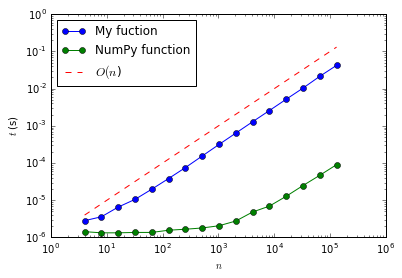

In [2]:
# Optional
## Dot product between two vectors

def dot_prod(v1, v2):
    v = 0
    for i in range(len(v1)):
        v += v1[i] * v2[i]
    return v

N = 2**np.arange(2, 18)
x = np.arange(N[-1])
my_times = []
np_times = []

for n in N:
    t = %timeit -q -n3 -o dot_prod(x[:n], x[:n])
    my_times.append(t.best)
    
    t = %timeit -q -n3 -o np.dot(x[:n], x[:n])
    np_times.append(t.best)

plt.loglog(N, my_times, marker='o', label='My fuction')
plt.loglog(N, np_times, marker='o', label='NumPy function')

plt.loglog(N, 1e-6*N, '--', label=r'$O(n$)')

plt.legend(loc=0);
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()

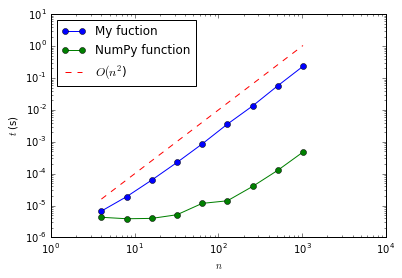

In [3]:
## Matrix-vector product

def mat_vec_prod(m, v):
    a = [0]*len(v[0])
    for i in range(len(v[0])):
        for j in range(len(v[0])):
            a[i] += m[i][j] * v[0][j]
    return a

N = 2**np.arange(2, 11)
my_times = []
np_times = []

for n in N:
    M = np.random.randint(100, size=(n, n))
    V = np.random.randint(100, size=(1, n))
    
    t = %timeit -q -n3 -o mat_vec_prod(M.tolist(), V.tolist())
    my_times.append(t.best)
    
    t = %timeit -q -n3 -o np.matmul(np.squeeze(np.asarray(M)), np.squeeze(np.asarray(V)))
    np_times.append(t.best)

plt.loglog(N, my_times, marker='o', label='My fuction')
plt.loglog(N, np_times, marker='o', label='NumPy function')

plt.loglog(N, 1e-6*N**2, '--', label=r'$O(n^2$)')

plt.legend(loc=0);
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()

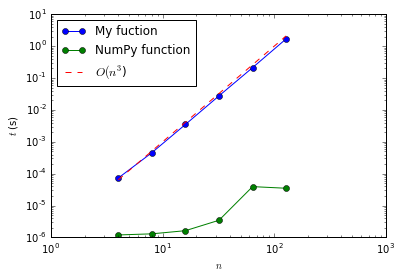

In [4]:
## Matrix-matrix product

def mat_mat_prod(b,c):
    a = np.zeros((len(b), len(b)))
    for i in range(len(b)):
        for j in range(len(b)):
            for k in range(len(b)):
                a[i][k] += b[i][j]*c[j][k]
    return a

N = 2**np.arange(2, 8)
my_times = []
np_times = []

for n in N:
    B = np.random.rand(n, n)
    C = np.random.rand(n, n)

    t = %timeit -q -n3 -o mat_mat_prod(B,C)
    my_times.append(t.best)
    
    t = %timeit -q -n3 -o np.matmul(B,C)
    np_times.append(t.best)

plt.loglog(N, my_times, marker='o', label='My fuction')
plt.loglog(N, np_times, marker='o', label='NumPy function')

plt.loglog(N, 1e-6*N**3, '--', label=r'$O(n^3$)')

plt.legend(loc=0);
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [5]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in long_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in long_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in long_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in long_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in long_scalars
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in long_scalars


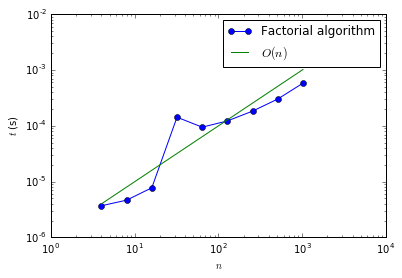

In [6]:
# YOUR CODE HERE
N = 2**np.arange(2, 11)
times = []

for n in N:
    t = %timeit -o -q -n3 -r1 factorial(n)

    times.append(t.best)

plt.loglog(N, times, marker='o', label='Factorial algorithm')
plt.loglog(N, 1e-6*N, label='$O(n)$')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)
plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [7]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [8]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [9]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 15)
 
# YOUR CODE HERE
times = []
for n in N:
    A = np.random.rand(n, n)
    t = %timeit -o -q -n3 -r1 np.linalg.slogdet(A)

    times.append(t.best)

Plot result:

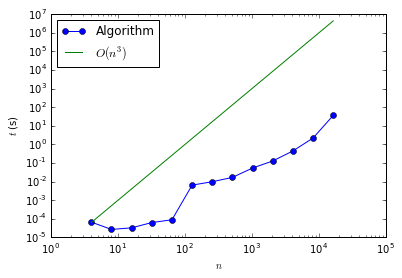

In [10]:
plt.loglog(N, times, marker='o', label='Algorithm')
plt.loglog(N, 1e-6*N**3, label='$O(n^3)$')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)
plt.show()